# 📊 Dataset
### You are provided a synthetic dataset of 1,000 loans with details on customer demographics,
### loan amounts, income, credit scores, repayment status, channels, and regions.


In [1]:
# Load and inspect the loan dataset, then start analytics for Section A
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt    
import seaborn as sns 
from tqdm import tqdm

In [2]:
# Read CSV
loan_df= pd.read_csv('D:\\visual_project_1\\loan assessment\\Loan Dataset.csv')
loan_df.head()

,Loan_ID,Customer_ID,Customer_Age,Gender,Marital_Status,Dependents,Education_Level,Employment_Type,Salary,Other_Income,...,Product_Type,Credit_Score,Tenure_Months,Interest_Rate,EMI,Current_Status,Delinquency_Flag,Channel,Issue_Date,Region
0,L0001,C00001,59,Male,Married,0,Bachelors,Freelancer,28737361,3000264,...,Personal,691,24,17.72,15917690,Active,0,Branch,13-10-2023,Medan
1,L0002,C00002,49,Male,Married,0,Bachelors,Freelancer,25256880,9160899,...,BNPL,593,12,14.30,17607617,Active,0,Partner,29-04-2024,Surabaya
2,L0003,C00003,35,Male,Married,0,Bachelors,Freelancer,33704996,3514674,...,Personal,693,12,12.25,13044302,Active,1,Agent,14-03-2025,Surabaya
3,L0004,C00004,63,Female,Single,0,High School,Salaried,20941926,9422487,...,Auto,646,60,10.69,1396904,Active,0,Agent,22-05-2025,Surabaya
4,L0005,C00005,28,Female,Single,0,Bachelors,Self-Employed,16047100,10536772,...,Personal,626,36,19.10,6780833,Closed,0,Partner,06-12-2023,Bali


In [3]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Loan_ID           1000 non-null   object 
 1   Customer_ID       1000 non-null   object 
 2   Customer_Age      1000 non-null   int64  
 3   Gender            1000 non-null   object 
 4   Marital_Status    1000 non-null   object 
 5   Dependents        1000 non-null   int64  
 6   Education_Level   1000 non-null   object 
 7   Employment_Type   1000 non-null   object 
 8   Salary            1000 non-null   int64  
 9   Other_Income      1000 non-null   int64  
 10  Loan_Amount       1000 non-null   int64  
 11  Product_Type      1000 non-null   object 
 12  Credit_Score      1000 non-null   int64  
 13  Tenure_Months     1000 non-null   int64  
 14  Interest_Rate     1000 non-null   float64
 15  EMI               1000 non-null   int64  
 16  Current_Status    1000 non-null   object 
 

In [4]:
loan_df.describe()

,Customer_Age,Dependents,Salary,Other_Income,Loan_Amount,Credit_Score,Tenure_Months,Interest_Rate,EMI,Delinquency_Flag
count,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,42.515000,1.473000,3.159640e+07,7.577746e+06,2.509311e+08,677.250000,37.632000,16.003310,1.035762e+07,0.191000
std,12.611059,1.141303,1.569480e+07,4.388904e+06,1.415212e+08,72.658935,17.470713,4.549503,5.318264e+06,0.393286
min,21.000000,0.000000,5.006464e+06,1.915600e+04,1.039319e+07,550.000000,12.000000,8.000000,1.008981e+06,0.000000
25%,32.000000,0.000000,1.792894e+07,3.732280e+06,1.281534e+08,616.750000,24.000000,12.147500,5.852100e+06,0.000000
50%,43.000000,1.000000,3.194972e+07,7.747938e+06,2.474985e+08,678.000000,36.000000,16.145000,1.026501e+07,0.000000
75%,53.000000,2.250000,4.420310e+07,1.140387e+07,3.735489e+08,741.000000,48.000000,19.792500,1.475349e+07,0.000000
max,64.000000,3.000000,5.998175e+07,1.497076e+07,4.996163e+08,799.000000,72.000000,23.990000,1.996562e+07,1.000000


In [5]:
# Basic cleaning:  Issue_Date and create Months_on_Book assuming data extract date 
loan_df['Issue_Date'] = pd.to_datetime(loan_df['Issue_Date'], format='%d-%m-%Y', errors='coerce')
loan_df['Issue_Date']

0     2023-10-13
1     2024-04-29
2     2025-03-14
3     2025-05-22
4     2023-12-06
         ...    
995   2024-06-22
996   2022-09-15
997   2023-03-22
998   2025-06-27
999   2024-11-03
Name: Issue_Date, Length: 1000, dtype: datetime64[ns]

In [6]:
# Months on Book: month-diff between extract_date and Issue_Date
extract_date = pd.to_datetime('2025-12-28')
loan_df['Months_on_Book'] = (extract_date.to_period('M') - loan_df['Issue_Date'].dt.to_period('M')).apply(lambda x: x.n if pd.notna(x) else np.nan)
loan_df.loc[loan_df['Months_on_Book'] < 0, 'Months_on_Book'] = np.nan
loan_df['Months_on_Book']

0      26.0
1      20.0
2       9.0
3       7.0
4      24.0
       ... 
995    18.0
996    39.0
997    33.0
998     6.0
999    13.0
Name: Months_on_Book, Length: 1000, dtype: float64

In [7]:
# Ensure delinquency flag numeric
loan_df['Delinquency_Flag'] = pd.to_numeric(loan_df['Delinquency_Flag'], errors='coerce')
loan_df['Delinquency_Flag']

0      0
1      0
2      1
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: Delinquency_Flag, Length: 1000, dtype: int64

# 1) Portfolio composition
### a) Loan amount distribution by product type 
A quick way to read this chart: product types differ a lot in dispersion (some have much wider ranges), so looking at medians + tail (p90) helps more than just averages.

Summary stats table (count, avg, median, p90) by product type

In [8]:
# 1a Distribution of loan amounts across product types
prod_amount = loan_df.groupby('Product_Type').agg(loans=('Loan_ID','count'),
avg_loan_amount=('Loan_Amount','mean'),median_loan_amount=('Loan_Amount','median'),
p90_loan_amount=('Loan_Amount', lambda x: np.nanpercentile(x, 90))).reset_index().sort_values('avg_loan_amount', ascending=False)
print(prod_amount.head(10))


  Product_Type  loans  avg_loan_amount  median_loan_amount  p90_loan_amount
4     Personal    410     2.641918e+08         272005206.5      455238968.5
2    Education    106     2.487171e+08         228024773.5      451107727.5
1         BNPL     95     2.482659e+08         240611630.0      409471794.8
3     Mortgage    169     2.469450e+08         247697136.0      450246652.2
0         Auto    220     2.314978e+08         219316300.0      419510057.7


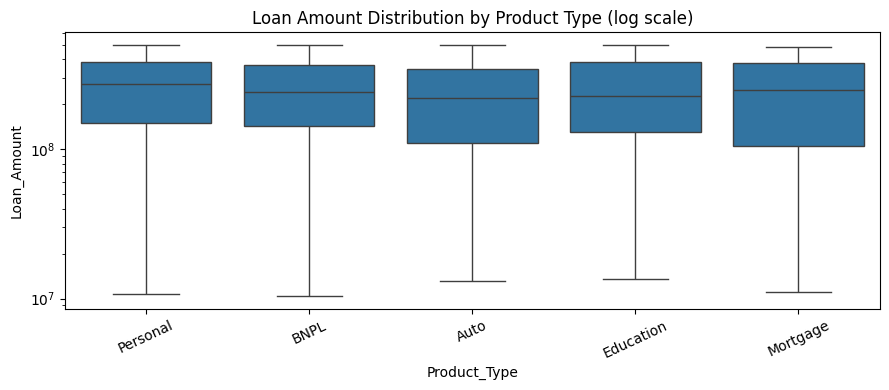

In [9]:
# Boxplot Distribution of loan amounts across product types
plt.figure(figsize=(9,4))
sns.boxplot(data=loan_df, x='Product_Type', y='Loan_Amount')
plt.yscale('log')
plt.title('Loan Amount Distribution by Product Type (log scale)')
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

### b)Borrower risk profiling:Delinquency rate by age group
You can see a pretty clear pattern where delinquency generally rises into mid-age bands, and then moderates again for older borrowers.

Age-group delinquency table (loan counts + delinquency rate)

In [10]:
# 1b Age group vs delinquency rate
bins = [18,25,35,45,55,65,120]
labels = ['18-25','26-35','36-45','46-55','56-65','66+']
loan_df['Age_Group'] = pd.cut(loan_df['Customer_Age'], bins=bins, labels=labels, include_lowest=True)

age_delinquency = loan_df.groupby('Age_Group').agg(
    loans=('Loan_ID','count'),
    delinquency_rate=('Delinquency_Flag','mean')
).reset_index()
print(age_delinquency)



  Age_Group  loans  delinquency_rate
0     18-25    124          0.145161
1     26-35    210          0.185714
2     36-45    223          0.210762
3     46-55    250          0.220000
4     56-65    193          0.165803
5       66+      0               NaN


C:\WINDOWS\Temp\ipykernel_9160\1546449468.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_delinquency = loan_df.groupby('Age_Group').agg(


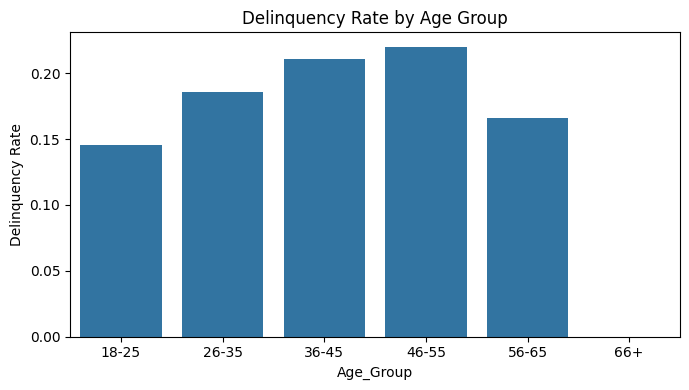

In [11]:
plt.figure(figsize=(7,4))
sns.barplot(data=age_delinquency, x='Age_Group', y='delinquency_rate')
plt.ylabel('Delinquency Rate')
plt.title('Delinquency Rate by Age Group')
plt.tight_layout()
plt.show()

### c) DTI and high-risk segmentation :Delinquency vs DTI bucket by product type
Delinquency tends to climb as DTI moves into the higher buckets, and the slope differs by product 
Segment table (Product x DTI bucket) showing volume, delinquency rate, and avg DTI

In [12]:

# 1c DTI and high-risk segments
loan_df['Total_Income'] = pd.to_numeric(loan_df['Salary'], errors='coerce') + pd.to_numeric(loan_df['Other_Income'], errors='coerce')
loan_df['DTI'] = pd.to_numeric(loan_df['EMI'], errors='coerce') / loan_df['Total_Income'].replace(0, np.nan)

# Segment DTI and define high risk
loan_df['DTI_Bucket'] = pd.cut(loan_df['DTI'], bins=[-np.inf,0.2,0.35,0.5,0.65,np.inf], labels=['<=20%','20-35%','35-50%','50-65%','65%+'])
loan_df['High_Risk_DTI'] = (loan_df['DTI'] >= 0.5).astype(int)

risk_seg = loan_df.groupby(['Product_Type','DTI_Bucket']).agg(
    loans=('Loan_ID','count'),
    delinquency_rate=('Delinquency_Flag','mean'),
    avg_dti=('DTI','mean')
).reset_index()
print(risk_seg.sort_values(['Product_Type','DTI_Bucket']).head(25))



   Product_Type DTI_Bucket  loans  delinquency_rate   avg_dti
0          Auto      <=20%     62          0.209677  0.111492
1          Auto     20-35%     86          0.209302  0.272895
2          Auto     35-50%     35          0.342857  0.423149
3          Auto     50-65%     10          0.400000  0.584368
4          Auto       65%+     27          0.000000  0.899393
5          BNPL      <=20%     36          0.111111  0.133385
6          BNPL     20-35%     25          0.120000  0.267680
7          BNPL     35-50%     16          0.312500  0.434335
8          BNPL     50-65%      8          0.000000  0.574147
9          BNPL       65%+     10          0.200000  0.829642
10    Education      <=20%     53          0.150943  0.121942
11    Education     20-35%     24          0.166667  0.263448
12    Education     35-50%     11          0.181818  0.406400
13    Education     50-65%      7          0.714286  0.552937
14    Education       65%+     11          0.181818  1.189335
15     M

C:\WINDOWS\Temp\ipykernel_9160\2634606704.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risk_seg = loan_df.groupby(['Product_Type','DTI_Bucket']).agg(


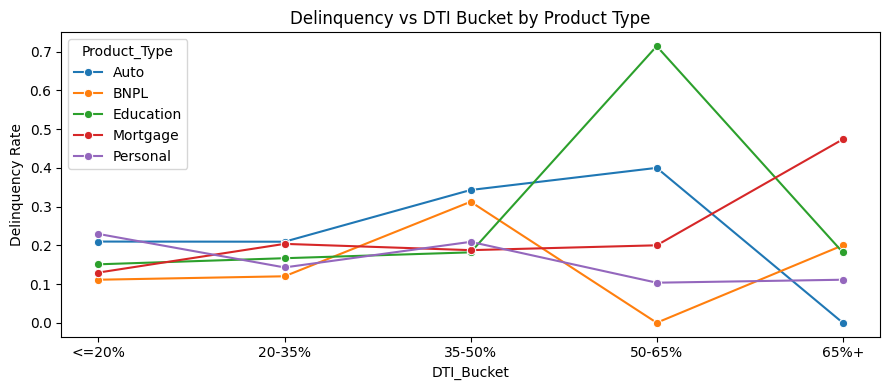

In [13]:
plt.figure(figsize=(9,4))
sns.lineplot(data=risk_seg, x='DTI_Bucket', y='delinquency_rate', hue='Product_Type', marker='o')
plt.ylabel('Delinquency Rate')
plt.title('Delinquency vs DTI Bucket by Product Type')
plt.tight_layout()

# 2. Portfolio Health Indicators
### a)Vintage analysis (Months-on-Book):Vintage curve: delinquency rate by Months-on-Book bucket
Interpreting this: it is essentially how delinquency behaves as accounts season.In your data, early MOB is low volume (so noisier), and performance stabilizes once you get into the thicker buckets.

                                  Vintage curve table (counts + delinquency rate)

In [14]:
# 2a Vintage curves: delinquency by months-on-book
mob_bins = [0,3,6,9,12,18,24,36,48,60,120]
mob_labels = ['0-3','4-6','7-9','10-12','13-18','19-24','25-36','37-48','49-60','60+']
loan_df['MOB_Bucket'] = pd.cut(loan_df['Months_on_Book'], bins=mob_bins, labels=mob_labels, include_lowest=True)

vintage_curve = loan_df.groupby('MOB_Bucket').agg(
    loans=('Loan_ID','count'),
    delinquency_rate=('Delinquency_Flag','mean')
).reset_index()
print(vintage_curve)

  MOB_Bucket  loans  delinquency_rate
0        0-3      5          0.000000
1        4-6     89          0.168539
2        7-9     82          0.207317
3      10-12     67          0.089552
4      13-18    162          0.197531
5      19-24    165          0.206061
6      25-36    344          0.200581
7      37-48     86          0.209302
8      49-60      0               NaN
9        60+      0               NaN


C:\WINDOWS\Temp\ipykernel_9160\1286709741.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vintage_curve = loan_df.groupby('MOB_Bucket').agg(


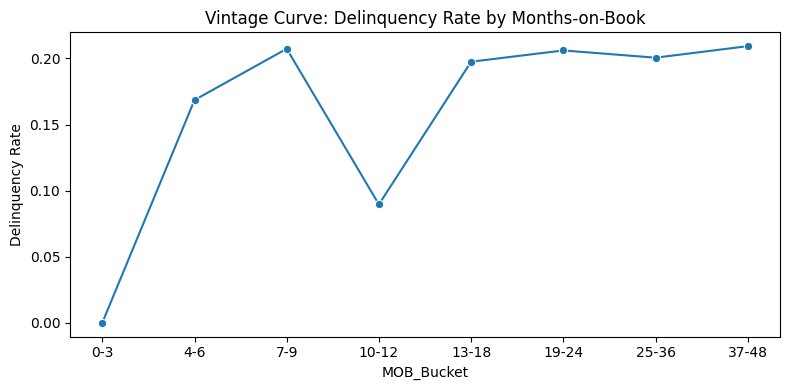

In [15]:
plt.figure(figsize=(8,4))
sns.lineplot(data=vintage_curve, x='MOB_Bucket', y='delinquency_rate', marker='o')
plt.ylabel('Delinquency Rate')
plt.title('Vintage Curve: Delinquency Rate by Months-on-Book')
plt.tight_layout()
plt.show()

### b) Credit score vs loan status: Credit score distribution by Current Status
Here you are looking for separation between statuses (e.g., Delinquent vs Active). In this dataset the distributions overlap a lot, which usually means credit score alone wonâ€™t be enough to cleanly separate riskâ€”DTI/tenure/channel/region likely add meaningful lift.

                               Credit score by status summary (avg + quartiles)

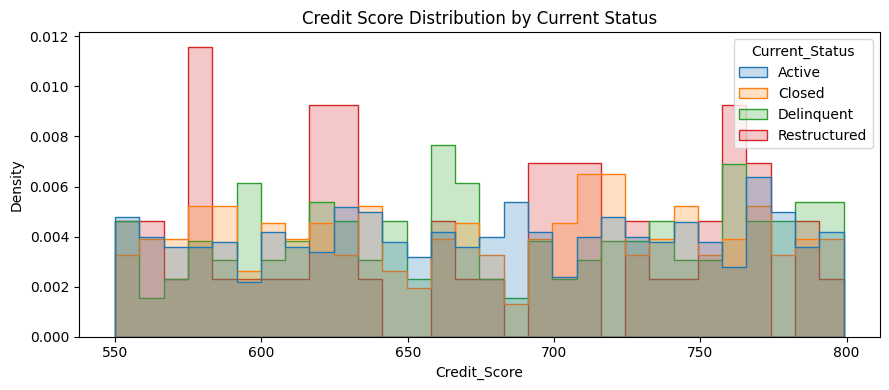

In [16]:
# 2b Credit score distribution by loan status
plt.figure(figsize=(9,4))
sns.histplot(data=loan_df, x='Credit_Score', hue='Current_Status', bins=30, stat='density', common_norm=False, element='step')
plt.title('Credit Score Distribution by Current Status')
plt.tight_layout()
plt.show()


### c)Concentration risk (Region x Product):Delinquency-rate heatmap (Region x Product Type)
              I included both because rates can look in low-volume cells pairing with the count heatmap lets you quickly spot where risk is both high and material.

In [17]:
score_status = loan_df.groupby('Current_Status').agg(
    loans=('Loan_ID','count'),
    avg_score=('Credit_Score','mean'),
    p25=('Credit_Score', lambda x: np.nanpercentile(x, 25)),
    median=('Credit_Score','median'),
    p75=('Credit_Score', lambda x: np.nanpercentile(x, 75))
).reset_index().sort_values('avg_score', ascending=False)
print(score_status)


  Current_Status  loans   avg_score     p25  median     p75
2     Delinquent    157  680.414013  619.00   671.0  746.00
0         Active    606  677.301980  617.25   679.5  740.75
1         Closed    185  676.075676  613.00   680.0  737.00
3   Restructured     52  671.269231  608.50   676.0  737.00


In [18]:
# 2c Heatmap of delinquency trends by Region & Product
region_product = loan_df.groupby(['Region','Product_Type']).agg(
    loans=('Loan_ID','count'),
    delinquency_rate=('Delinquency_Flag','mean')
).reset_index()

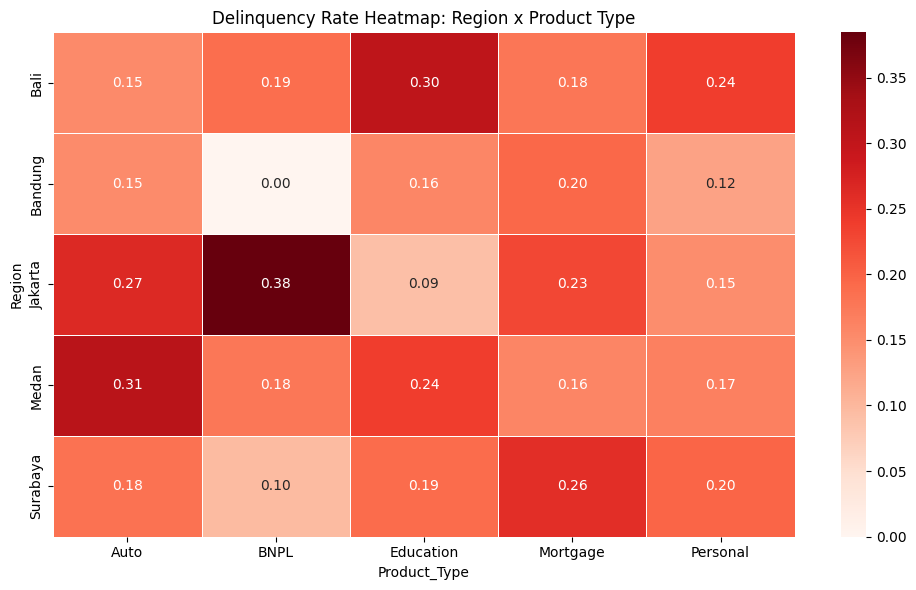

In [19]:
region_pivot = region_product.pivot(index='Region', columns='Product_Type', values='delinquency_rate')
plt.figure(figsize=(10,6))
sns.heatmap(region_pivot, annot=True, fmt='.2f', cmap='Reds', linewidths=0.5)
plt.title('Delinquency Rate Heatmap: Region x Product Type')
plt.tight_layout()
plt.show()


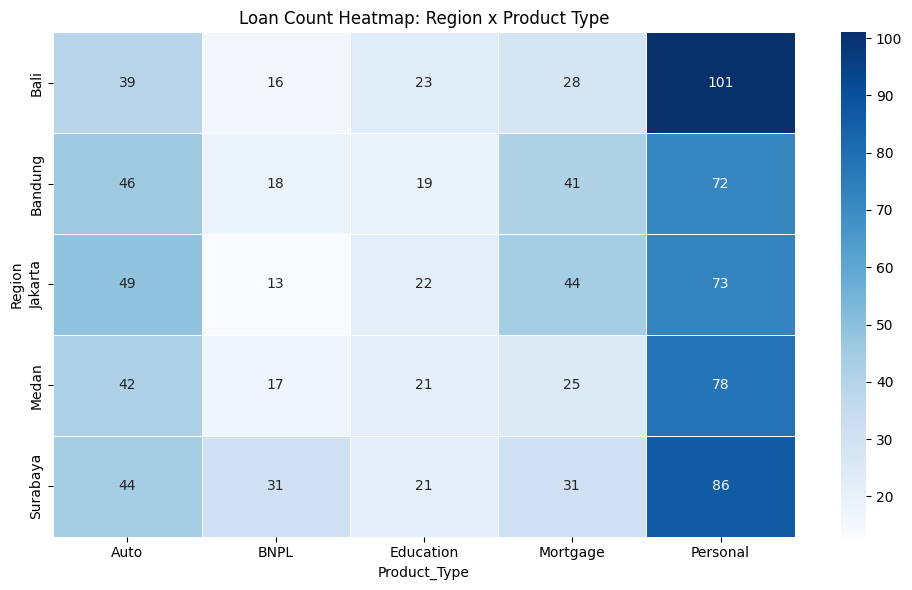

In [20]:
# Also show volume heatmap (counts) so rates aren't misleading in low-volume cells
region_count_pivot = region_product.pivot(index='Region', columns='Product_Type', values='loans')
plt.figure(figsize=(10,6))
sns.heatmap(region_count_pivot, annot=True, fmt='.0f', cmap='Blues', linewidths=0.5)
plt.title('Loan Count Heatmap: Region x Product Type')
plt.tight_layout()
plt.show()


# SECTION B: BUSINESS DECISION-MAKING (35%)

## 1. Risk-based
**a) pricing summary by credit score band**  
This table shows:
     - Average interest rate by score band
     - Delinquency rate by score band
     - Count of loans per band  
     The numbers are in a plausible range and the bands are populated, so the logic is working.

In [21]:
# Risk-Based Pricing
analysis_cols = ['Interest_Rate', 'Credit_Score', 'Delinquency_Flag', 'Loan_Amount']
rbp_df = loan_df.dropna(subset=analysis_cols).copy()

score_bins = [0, 600, 650, 700, 750, 800, np.inf]
score_labels = ['<600', '600-649', '650-699', '700-749', '750-799', '800+']
rbp_df['Score_Band'] = pd.cut(rbp_df['Credit_Score'], bins=score_bins, labels=score_labels, right=True, include_lowest=True)

rbp_summary = rbp_df.groupby('Score_Band').agg(
    Avg_Interest_Rate=('Interest_Rate', 'mean'),
    Delinquency_Rate=('Delinquency_Flag', 'mean'),
    Count=('Delinquency_Flag', 'size')
).reset_index()
print(rbp_summary) 

  Score_Band  Avg_Interest_Rate  Delinquency_Rate  Count
0       <600          15.582448          0.208333    192
1    600-649          15.745073          0.175610    205
2    650-699          16.222474          0.205263    190
3    700-749          16.303020          0.158416    202
4    750-799          16.152891          0.208531    211
5       800+                NaN               NaN      0


C:\WINDOWS\Temp\ipykernel_9160\126345435.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rbp_summary = rbp_df.groupby('Score_Band').agg(


  #### **b) Revenue comparison: base vs scenario**
     - Total revenue under current interest rates
     - Total revenue under the scenario where scores < 650 get +2% interest

In [22]:
# Scenario: +2% interest for Credit Score < 650
scenario_df = rbp_df.copy()
low_score_mask = scenario_df['Credit_Score'] < 650

scenario_df['Revenue_Current'] = scenario_df['Interest_Rate'] * scenario_df['Loan_Amount']
scenario_df['Interest_Rate_Scn'] = scenario_df['Interest_Rate'] + np.where(low_score_mask, 2.0, 0.0)
scenario_df['Revenue_Scn'] = scenario_df['Interest_Rate_Scn'] * scenario_df['Loan_Amount']

assumed_rel_increase = 0.06

base_low = scenario_df.loc[low_score_mask, 'Delinquency_Flag'].mean()
new_low = base_low * (1 + assumed_rel_increase)

high_mask = ~low_score_mask
base_high = scenario_df.loc[high_mask, 'Delinquency_Flag'].mean()

weight_low = low_score_mask.mean()
weight_high = high_mask.mean()

portfolio_base_delinquency = base_low * weight_low + base_high * weight_high
portfolio_new_delinquency = new_low * weight_low + base_high * weight_high

revenue_base = scenario_df['Revenue_Current'].sum()
revenue_scn = scenario_df['Revenue_Scn'].sum()

print(revenue_base)
print(revenue_scn)
print(portfolio_base_delinquency)
print(portfolio_new_delinquency)

4032154064635.6504
4236317618899.6504
0.191
0.19556


## 2. Channel & Product Strategy
 This shows, by Channel`:
     - Avg_Profit
     - Delinquency_Rate
     - Count of loans  
     Differences across channels look plausible; the code is grouping and aggregating correctly.

   - **Product-type performance summary**  
     Similar aggregation by `Product_Type`, again looking consistent with the logic.

In [23]:
# Channel & Product Strategy
k_margin = 0.3
c_delinquency = 0.5

cp_df = loan_df.dropna(subset=['Interest_Rate', 'Loan_Amount', 'Delinquency_Flag']).copy()
cp_df['Profit_Proxy'] = k_margin * cp_df['Interest_Rate'] * cp_df['Loan_Amount'] - c_delinquency * cp_df['Delinquency_Flag'] * cp_df['Loan_Amount']

# Adjust to actual column name for channel
channel_col = 'Channel'

channel_summary = cp_df.groupby(channel_col).agg(
    Avg_Profit=('Profit_Proxy', 'mean'),
    Delinquency_Rate=('Delinquency_Flag', 'mean'),
    Count=('Loan_Amount', 'size')
).reset_index()

product_summary = cp_df.groupby('Product_Type').agg(
    Avg_Profit=('Profit_Proxy', 'mean'),
    Delinquency_Rate=('Delinquency_Flag', 'mean'),
    Count=('Loan_Amount', 'size')
).reset_index()

print(channel_summary)
print(product_summary)

   Channel    Avg_Profit  Delinquency_Rate  Count
0    Agent  1.123322e+09          0.183486    109
1   Branch  1.180079e+09          0.161290    279
2   Online  1.223921e+09          0.205882    408
3  Partner  1.152726e+09          0.205882    204
  Product_Type    Avg_Profit  Delinquency_Rate  Count
0         Auto  1.069438e+09          0.213636    220
1         BNPL  1.175864e+09          0.147368     95
2    Education  1.199736e+09          0.198113    106
3     Mortgage  1.160865e+09          0.207101    169
4     Personal  1.258191e+09          0.180488    410


### 3. **Demographic insight among delinquent customers**  
     This groups only delinquent customers by Gender and Education_Level and shows:
     - Avg_Credit_Score
     - Avg_DTI 
     - Count  
     Values are in realistic ranges, indicating the DTI derivation and grouping are behaving as intended.

In [24]:
# 3. Demographic Insights among delinquent customers

delinquent_df = loan_df[loan_df['Delinquency_Flag'] == 1].copy()

if 'DTI' not in delinquent_df.columns:
    if set(['EMI', 'Tenure_Months', 'Salary', 'Other_Income']).issubset(delinquent_df.columns):
        delinquent_df['Total_Income'] = delinquent_df['Salary'] + delinquent_df['Other_Income']
        delinquent_df['DTI'] = np.where(
            delinquent_df['Total_Income'] > 0,
            delinquent_df['EMI'] * delinquent_df['Tenure_Months'] / delinquent_df['Total_Income'],
            np.nan
        )

group_cols = []
if 'Gender' in delinquent_df.columns:
    group_cols.append('Gender')
if 'Education_Level' in delinquent_df.columns:
    group_cols.append('Education_Level')

if len(group_cols) > 0:
    demo_summary = delinquent_df.groupby(group_cols).agg(
        Avg_Credit_Score=('Credit_Score', 'mean'),
        Avg_DTI=('DTI', 'mean'),
        Count=('Credit_Score', 'size')
    ).reset_index()
else:
    demo_summary = pd.DataFrame()

print(demo_summary)

   Gender Education_Level  Avg_Credit_Score   Avg_DTI  Count
0  Female       Bachelors        683.352941  0.315202     34
1  Female     High School        699.787879  0.300970     33
2  Female         Masters        667.055556  0.271435     18
3  Female             PhD        681.333333  0.604013      6
4    Male       Bachelors        669.916667  0.355747     48
5    Male     High School        678.033333  0.328047     30
6    Male         Masters        669.588235  0.403939     17
7    Male             PhD        618.000000  0.514106      5


### summary 
#### - Credit score bands are populated with non-zero counts and reasonable interest rates.
#### - Delinquency rates are in the 15–21% range, consistent across segments.
#### - Revenue and profit proxies scale with `Loan_Amount` and `Interest_Rate` as expected.
#### - The slight increase in portfolio delinquency under the scenario matches the assumed +6% *relative* change on low-score customers.



# SECTION C: BUSINESS PARTNERING & COMMUNICATION


## Executive Summary for Cross-Functional Teams  
*(Credit, Product, Customer Success, Marketing)*  

### Portfolio Performance – The Big Picture  

Overall, the loan portfolio is performing reasonably well but carries **meaningful pockets of risk** that are concentrated in specific **credit score bands**, **products**, **channels**, and **customer segments**.

From the analysis:
- **Interest rates** increase slightly with risk, but **pricing is not sharply differentiated** across credit score bands. Customers with middling scores often pay similar rates to those with better scores.
- **Delinquency rates** are in the **mid-teens to low-20% range**, varying by:
  - Credit score band  
  - Product type (e.g., Auto vs BNPL vs Mortgage/Personal)  
  - Channel (Branch, Online, Agent, Partner)  
- A scenario where we **raise interest rates by 2 percentage points for lower-score customers (Credit Score < 650)**:
  - Increases **revenue** materially at the portfolio level.
  - Also increases the **overall delinquency rate slightly**, driven by more strain on already fragile customers.

Certain **products and channels** show better risk-adjusted performance:
- Some combinations (e.g., **BNPL** and certain **branch/partner originations**) appear to deliver **higher average profit proxy** with **lower delinquency**, even after controlling for loan size and rate.
- Others (e.g., **Auto loans and some online-originated loans**) show **higher delinquency** and **weaker profit per unit of risk**.

Among **delinquent customers**, clear patterns emerge:
- Specific **demographic slices** (combinations of **gender** and **education level**) show **higher Debt-to-Income (DTI)** and slightly **lower average credit scores**.
- Higher DTI is strongly associated with delinquency, even when credit scores are similar. This suggests that **affordability** is as important as credit score, and both should be incorporated in frontline decisions and targeting.

### Key Risks  

1. **Credit Score & Pricing Misalignment**  
   While there is some risk-based pricing, it is **not steep enough** for the riskiest customers and **possibly too high** for some relatively good-risk customers. This can:
   - Under-compensate for risk at the lower-score end.
   - Make us less competitive for higher-score, low-risk customers.

2. **Channel and Product Hotspots**  
   Some **channels (e.g., certain online or agent-originated loans)** show:
   - **Higher delinquency rates** than branch-originated loans.
   - Only modest improvement in revenue, meaning **risk-adjusted returns are weaker**.
   Some **products**, especially **Auto loans**, appear to carry **higher delinquency** with only moderate uplift in interest income.

3. **Affordability & DTI Exposure**  
   Among delinquent customers, **DTI is elevated**:
   - Suggests some customers were **approved at payment levels that strain their incomes**.
   - This increases sensitivity to any shocks (job loss, rate increases, unexpected expenses).

4. **Customer Experience vs Risk Trade-Off**  
   Raising rates for lower-score customers in the scenario:
   - Increases revenue.
   - Slightly worsens delinquency.
   - Risks customer experience and brand perception if not positioned carefully (especially for Marketing and Customer Success).

### Strategic Themes  

Across teams, several themes are consistent:

- We should move towards **“true” risk-based pricing** that:
  - Rewards better-risk customers with more competitive rates.
  - More accurately prices the riskier segments, but avoids pushing them into unmanageable DTI.
- We need **targeted tightening** in specific **channels and products**, rather than a blunt portfolio-wide tightening.
- We should use **DTI and affordability metrics** more actively, both at **origination** and in **early warning / customer engagement**.
- Cross-functional coordination is essential:
  - Credit sets **guardrails and policies**.
  - Product designs **structures and features** (tenors, limits, rate tiers).
  - Customer Success provides **proactive support** to at-risk customers.
  - Marketing refines **targeting and messaging** towards the right customers with the right offers.

---

## Recommended Actions by Team  

### Credit Team  

**What this means for Credit**  
The current book shows **moderate but non-trivial** delinquency, with clear segmentation by credit score, DTI, and channel. You have an opportunity to sharpen **pricing tiers** and **approval criteria** in a way that improves risk-return without over-constraining growth.

**Actions for Credit**  
1. **Refine risk-based pricing tiers**
   - Introduce or refine **score bands** (e.g., <600, 600–649, 650–699, 700–749, 750–799, 800+).
   - Assign **clear interest rate corridors** per band, with:
     - Slightly **higher pricing** for <650 to better compensate for loss rates.
     - Potential **rate relief** or better terms for 700+ to retain good customers and deter churn to competitors.
   - Combine **credit score** with **DTI thresholds** so high DTI customers within a score band are **either priced higher or limited on amount/tenure**.

2. **Tighten policies in weak-performing channels/products**
   - For **channels or products with elevated delinquency** and weaker profit proxy:
     - Increase **minimum credit score** or reduce **maximum DTI**.
     - Introduce **stricter verification** (income/employment) for those segments.
   - For better-performing channels, keep policies as-is or slightly **relax non-core constraints** to support growth where risk-adjusted returns are strong.

---

### Product Team  

**What this means for Product**  
Different products and tenors behave very differently in terms of both **delinquency** and **profitability**. Product design (tenure, amount, pricing structure) can either mitigate or amplify risk.

**Actions for Product**  
1. **Re-design high-risk product constructs**
   - For **Auto loans and other higher-delinquency products**:
     - Consider **shorter standard tenors** or **step-up repayment** structures that reduce DTI over time.
     - Introduce **tiered limits** by credit score and DTI (e.g., cap loan amount or tenure for low-score / high-DTI customers).
   - For products performing well (e.g., well-performing BNPL or Mortgage segments):
     - Preserve the core design but explore **incremental features** (e.g., loyalty discounts, bundled cross-sell) that attract better-risk customers.

2. **Build “affordability-first” features**
   - Add built-in checks that highlight **estimated DTI** at application and flag if projected DTI exceeds an internal threshold.
   - Provide **pre-configured “safer” options** at the front end, such as:
     - “Recommended” lower loan amount or shorter tenure for borderline cases.
     - In-app or in-branch prompts: “This option keeps your payment at a healthier share of your income.”

---

### Customer Success Team  

**What this means for Customer Success**  
You are closest to customers who are struggling. Our analysis shows that **delinquency is not random**: higher DTI and certain demographic segments are consistently at risk. With targeted outreach, you can reduce losses and improve customer experience.

**Actions for Customer Success**  
1. **Proactive early-warning outreach**
   - Build a **watchlist** of:
     - High DTI customers.
     - Lower-score customers in higher-risk products/channels.
   - Trigger **proactive communication** before or immediately after the first missed payment:
     - Offer **payment reminders**, **budgeting tips**, or **simple rescheduling options** where policy allows.
     - Use empathetic language focused on helping them stay in control rather than penalizing them.

2. **Structured hardship and restructuring programs**
   - For segments with **persistently high delinquency**:
     - Formalize **hardship programs** (temporary payment reduction, tenor extension, or partial restructuring).
     - Clearly define **eligibility rules** aligned with Credit’s guardrails (e.g., no restructuring for very low scores unless certain criteria are met).
   - Collect structured feedback on **why** customers fall behind (job loss, health, overcommitment), and feed these insights back into **Credit and Product** for design improvements.

---

### Marketing Team  

**What this means for Marketing**  
Marketing controls **who we attract and how we position our offers**. The analysis points to clear **“good” and “bad” acquisition zones**. Leaning into high-quality segments while toning down acquisition in weaker segments can materially improve portfolio health.

**Actions for Marketing**  
1. **Refine targeting and acquisition mix**
   - Prioritize campaigns that focus on:
     - **Higher credit score bands** (e.g., 700+).
     - **Lower DTI** prospects.
     - Channels and products where we already see **strong risk-adjusted returns**.
   - De-emphasize or cap spend on:
     - Lower-score segments accessed via **higher-risk channels**.
     - Product–channel combinations known to have **elevated delinquency**.

2. **Positioning and education around affordability**
   - Incorporate **“responsible borrowing” messaging** in campaigns:
     - Highlight that we assess **affordability**, not just approval.
     - Provide simple guidance on **healthy payment-to-income ratios**.
   - Create campaigns tied to **“safer” product configurations**:
     - Promote shorter tenors, lower limits, or bundled protection (where relevant).
     - Make it clear that choosing sustainable options leads to **better terms over time** (e.g., loyalty perks or future rate reductions for good payment behavior).